<a href="https://colab.research.google.com/github/Dixit-Akshita/AkshitaDixit15/blob/main/Even_Odd_Signal_Decomposition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

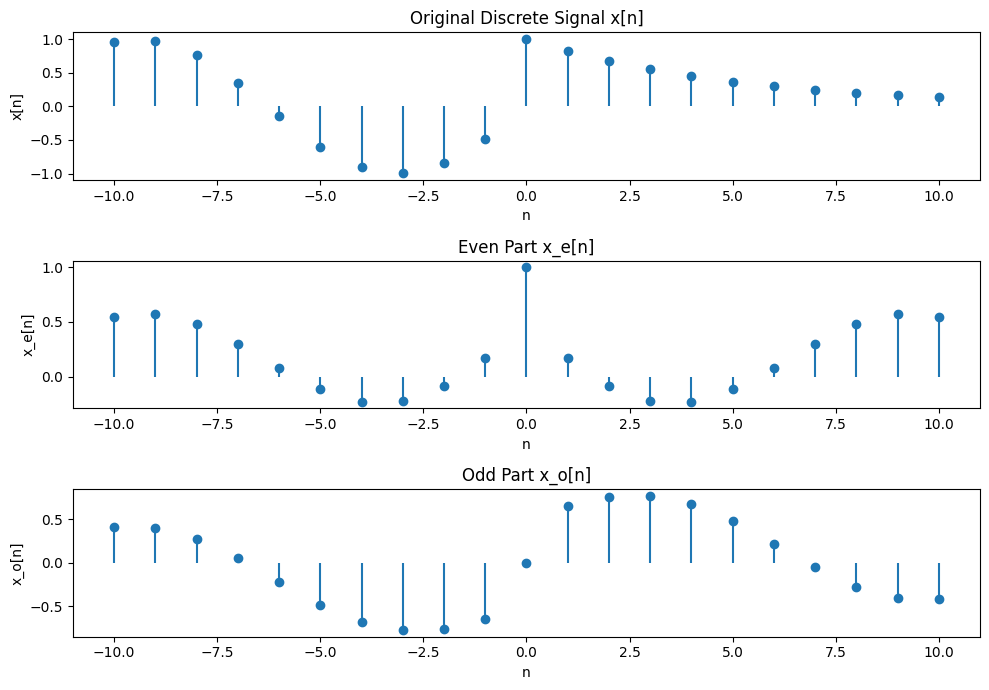

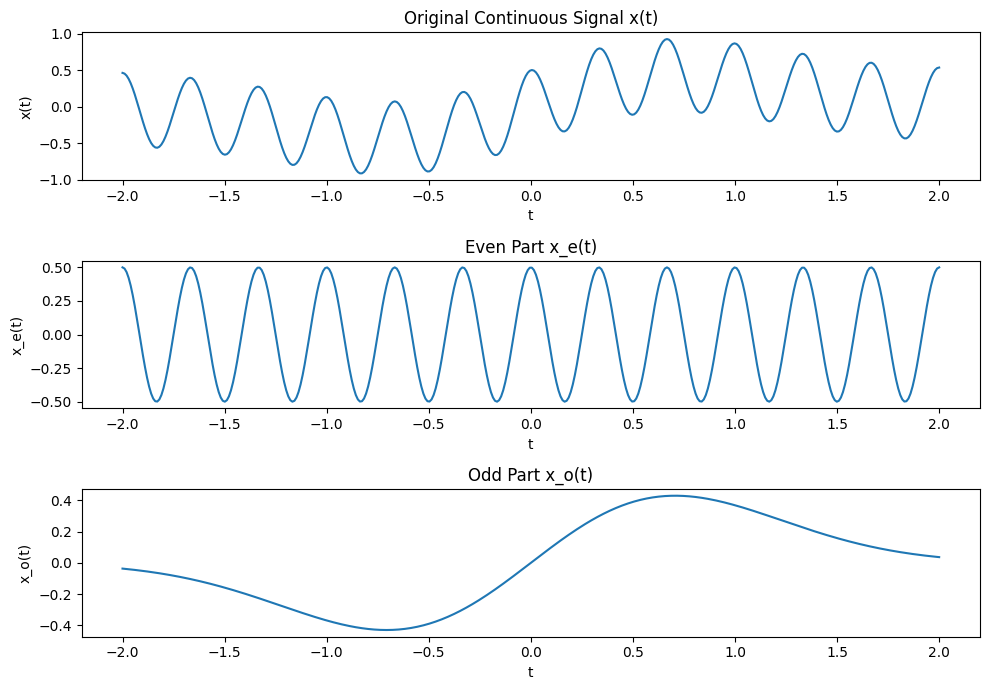

Reconstruction Error (Discrete): 1.1102230246251565e-16
Reconstruction Error (Continuous): 5.551115123125783e-17

Plots saved as:
  - discrete_decomp.png
  - continuous_decomp.png


In [2]:
# ================================
# EVEN–ODD SIGNAL DECOMPOSITION
# ================================
# Author: Your Name
# Subject: Signal and Systems Project
# Description:
# This program decomposes a signal into its
# even and odd components and plots the results.
# ================================

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# FUNCTION: Discrete Decomposition
# -----------------------------
def even_odd_discrete(x, n):
    x_even = np.zeros(len(x))
    x_odd = np.zeros(len(x))

    for i in range(len(n)):
        if -n[i] in n:
            index = np.where(n == -n[i])[0][0]
            x_neg = x[index]
        else:
            x_neg = 0

        x_even[i] = 0.5 * (x[i] + x_neg)
        x_odd[i] = 0.5 * (x[i] - x_neg)

    return x_even, x_odd

# -----------------------------
# FUNCTION: Continuous Decomposition
# -----------------------------
def even_odd_continuous(t, x):
    x_neg = np.interp(-t, t, x, left=0, right=0)
    x_even = 0.5 * (x + x_neg)
    x_odd = 0.5 * (x - x_neg)
    return x_even, x_odd

# -----------------------------
# DISCRETE SIGNAL EXAMPLE
# -----------------------------
n = np.arange(-10, 11)
x = np.where(n >= 0, np.exp(-0.2*n), np.sin(0.5*n))

x_even, x_odd = even_odd_discrete(x, n)

# Plot Discrete Signal
plt.figure(figsize=(10, 7))

plt.subplot(3, 1, 1)
plt.stem(n, x, basefmt=" ")
plt.title("Original Discrete Signal x[n]")
plt.xlabel("n")
plt.ylabel("x[n]")

plt.subplot(3, 1, 2)
plt.stem(n, x_even, basefmt=" ")
plt.title("Even Part x_e[n]")
plt.xlabel("n")
plt.ylabel("x_e[n]")

plt.subplot(3, 1, 3)
plt.stem(n, x_odd, basefmt=" ")
plt.title("Odd Part x_o[n]")
plt.xlabel("n")
plt.ylabel("x_o[n]")

plt.tight_layout()
plt.savefig("discrete_decomp.png")
plt.show()

# -----------------------------
# CONTINUOUS SIGNAL EXAMPLE
# -----------------------------
t = np.linspace(-2, 2, 400)
x_t = t * np.exp(-t**2) + 0.5 * np.cos(6*np.pi*t)

x_even_t, x_odd_t = even_odd_continuous(t, x_t)

# Plot Continuous Signal
plt.figure(figsize=(10, 7))

plt.subplot(3, 1, 1)
plt.plot(t, x_t)
plt.title("Original Continuous Signal x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")

plt.subplot(3, 1, 2)
plt.plot(t, x_even_t)
plt.title("Even Part x_e(t)")
plt.xlabel("t")
plt.ylabel("x_e(t)")

plt.subplot(3, 1, 3)
plt.plot(t, x_odd_t)
plt.title("Odd Part x_o(t)")
plt.xlabel("t")
plt.ylabel("x_o(t)")

plt.tight_layout()
plt.savefig("continuous_decomp.png")
plt.show()

# -----------------------------
# Verification
# -----------------------------
x_recon = x_even + x_odd
error = np.max(np.abs(x - x_recon))
print("Reconstruction Error (Discrete):", error)

x_recon_t = x_even_t + x_odd_t
error_t = np.max(np.abs(x_t - x_recon_t))
print("Reconstruction Error (Continuous):", error_t)

print("\nPlots saved as:")
print("  - discrete_decomp.png")
print("  - continuous_decomp.png")